In [3]:
%plot --format svg

In [4]:
setdefaults

# Initial Value Problems (ODEs)
*Ch. 22*

## Euler's method 

$\frac{dy}{dt}=f(t,y)$

$y_{i+1}=y_{i}+\int_{t_{i}}^{t_{i+1}}f(t,y)dt$

$y_{i+1}\approx y_{i}+f(t_{i},y_{i})h$

The error of this method is:

$E_{t}=\frac{f'(t_i , y_i )}{2!}h^2 + \cdots + O(h^{n+1})$

or

$E_{a}=O(h^2)$

### Example: Freefalling problem

An object is falling and has a drag coefficient of 0.25 kg/m and  mass of 60 kg
Define time from 0 to 12 seconds with `N` timesteps 
function defined as `freefall`

Using the Euler ODE solution results in a conditionally stable solution *(at some point the time steps are too large to solve the problem)*

In [6]:
function [v_analytical,v_terminal,t]=freefall(N,tmax)
    t=linspace(0,tmax,N)';
    c=0.25; m=60; g=9.81; v_terminal=sqrt(m*g/c);

    v_analytical = v_terminal*tanh(g*t/v_terminal);
    v_numerical=zeros(length(t),1);
    delta_time =diff(t);
    for i=1:length(t)-1
        v_numerical(i+1)=v_numerical(i)+(g-c/m*v_numerical(i)^2)*delta_time(i);
    end
    % Print values near 0,2,4,6,8,10,12 seconds
    indices = round(linspace(1,length(t),7));
    fprintf('time (s)|  error (m/s)\n')
    fprintf('-------------------------\n')
    M=[t(indices),abs(v_analytical(indices)-v_numerical(indices))];
    fprintf('%7.1f | %10.2f\n',M(:,1:2)');
    plot(t,v_analytical,'-',t,v_numerical,'o-')
    xlabel('time (s)')
    ylabel('velocity (m/s)')
end

time (s)|  error (m/s)
-------------------------
    0.0 |       0.00
    2.3 |       0.46
    4.0 |       0.95
    6.3 |       1.03
    8.0 |       0.80
   10.3 |       0.46
   12.0 |       0.28

O(h^2)=0.33


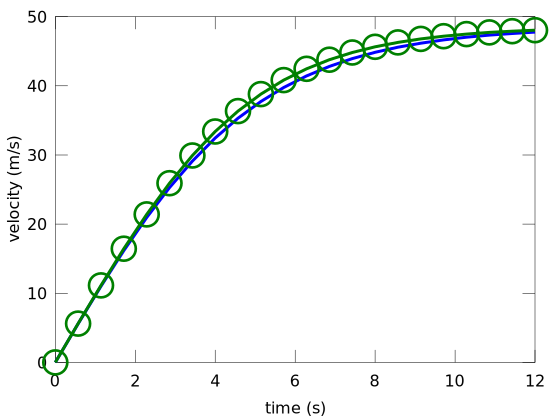

In [7]:
[v_an,v_t,t]=freefall(22,12);
fprintf('\nO(h^2)=%1.2f',min(diff(t).^2))

## Heun Method

Increase accuracy with *predictor-corrector approach*

$y_{i+1}=y_{i}^{m}+f(t_{i},y_{i})h$

$y_{i+1}^{j}=y_{i}^{m}+
\frac{f(t_{i},y_{i}^{m})+f(t_{i+1},y_{i+1}^{i-1})}{2}h$

This is analagous to the trapezoidal rule

$\int_{t_{i}}^{t_{i+1}}f(t,y)dt=\frac{f(t_{i},y_{i})+f(t_{i+1},y_{i+1})}{2}h$

therefore the error is

$E_{t}=\frac{-f''(\xi)}{12}h^3$

### Example with Heun's method

Problem Statement. Use Heun’s method with iteration to integrate 

$y' = 4e^{0.8t} − 0.5y$

from t = 0 to 4 with a step size of 1. The initial condition at t = 0 is y = 2. Employ a stopping criterion of 0.00001% to terminate the corrector iterations.

In [3]:
yp=@(t,y) 4*exp(0.8*t)-0.5*y;
t=linspace(0,4,5)';
y=zeros(size(t));
dy=zeros(size(t));
dy_corr=zeros(size(t));
y(1)=2;
dy(1)=yp(t(1),y(1))
y(2)=y(1)+dy(1)*(t(2)-t(1))

dy =

   3
   0
   0
   0
   0

y =

   2
   5
   0
   0
   0



In [4]:
% improve estimate for y(2)
dy_corr(1)=(dy(1)+yp(t(2),y(2)))/2
y(2)=y(1)+dy_corr(1)*(t(2)-t(1))

dy_corr =

   4.70108
   0.00000
   0.00000
   0.00000
   0.00000

y =

   2.00000
   6.70108
   0.00000
   0.00000
   0.00000



### This process can be iterated until a desired tolerance is achieved

In [13]:
yp=@(t,y) 4*exp(0.8*t)-0.5*y;
t=linspace(0,4,5)';
y=zeros(size(t));
dy=zeros(size(t));
dy_corr=zeros(size(t));
y(1)=2;
for i=1:length(t)-1
    dy(i)=yp(t(i),y(i));
    dy_corr(i)=yp(t(i),y(i));
    y(i+1)=y(i)+dy_corr(i)*(t(i+1)-t(i));
    n=0;
    e=10;
    while (1)
        n=n+1;
        yold=y(i+1);
        dy_corr(i)=(dy(i)+yp(t(i+1),y(i+1)))/2;
        y(i+1)=y(i)+dy_corr(i)*(t(i+1)-t(i));
        e=abs(y(i+1)-yold)/y(i+1)*100;
        if e<= 0.00001 | n>100, break, end
    end
end

In [14]:

y_euler=zeros(size(t));
for i=1:length(t)-1
    dy(i)=yp(t(i),y(i));
    y_euler(i+1)=y_euler(i)+dy(i)*(t(i+1)-t(i));
end

y_an =@(t) 4/1.3*exp(0.8*t)-1.0769*exp(-t/2)
dy_an=@(t) 0.8*4/1.3*exp(0.8*t)+1.0769/2*exp(-t/2)


y_an =

@(t) 4 / 1.3 * exp (0.8 * t) - 1.0769 * exp (-t / 2)

dy_an =

@(t) 0.8 * 4 / 1.3 * exp (0.8 * t) + 1.0769 / 2 * exp (-t / 2)



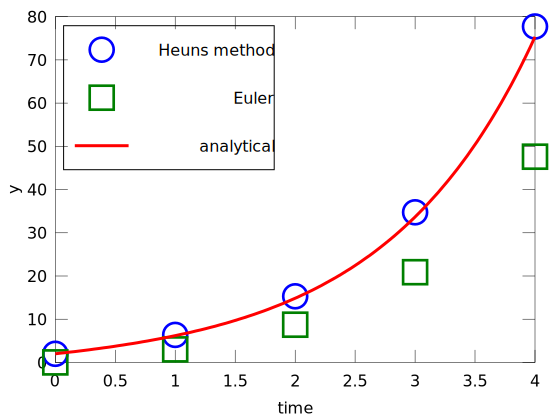

In [15]:
plot(t,y,'o',t,y_euler,'s',linspace(min(t),max(t)),y_an(linspace(min(t),max(t))))
legend('Heuns method','Euler','analytical','Location','NorthWest')
xlabel('time')
ylabel('y')

# Thanks